In [1]:
import os
import pandas as pd
import math

def magnitude(X, Y, Z):
    return math.sqrt(float(X**2) + float(Y**2) + float(Z**2))


path = 'gestures-dataset'

dataset = None

for subject in os.listdir(path):
    if os.path.isfile(os.path.join(path, subject)):
        continue
    if subject in ('U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08'):
        print(subject)
        for gesture in os.listdir(os.path.join(path, subject)):
            if os.path.isfile(os.path.join(path, subject, gesture)):
                continue
            #print(gesture)
            gesture = str(gesture)
            for eventfile in os.listdir(os.path.join(path, subject, gesture)):
                #print(eventfile)
                if os.path.isfile(os.path.join(path, subject, gesture, eventfile)):
                    df = pd.read_csv(os.path.join(path, subject, gesture, eventfile), \
                        sep = ' ', \
                        names = ['System.currentTimeMillis()', \
                        'System.nanoTime()', \
                        'event.timestamp', \
                        'X', \
                        'Y', \
                        'Z' \
                        ])
                    df = df[["event.timestamp", "X", "Y", "Z"]]
                    
                    
                    #print(df["event.timestamp"][0])
                    df['magnitude'] = df.apply(lambda row: magnitude(row['X'], row['Y'], row['Z']), axis=1)
                    start = df["event.timestamp"][0]
                    df["event.timestamp"] -= start
                    df["event.timestamp"] /= 1000000
                    df["subject"] = subject
                    df["gesture"] = gesture
                    df["event"] = str(eventfile[:-4])
                    #print(df)
                    if dataset is None:
                        dataset = df.copy()
                    else:
                        dataset = pd.concat([dataset, df])

dataset = dataset.sort_values(by=['gesture','subject','event','event.timestamp'])
#print(dataset)
print(dataset.head(10))
print(dataset.tail(10))

                    
            
            

U01
U02
U03
U04
U05
U06
U07
U08
   event.timestamp         X         Y          Z  magnitude subject gesture  \
0              0.0  1.532289 -0.919373  10.113108  10.269767     U01      01   
1            110.0  0.919373 -0.919373   9.959879  10.044386     U01      01   
2            220.0  1.838747 -0.153229  10.726024  10.883568     U01      01   
3            330.0  5.822699  3.371036  10.879252  12.791631     U01      01   
4            440.0  6.435614  1.532289   9.193734  11.326508     U01      01   
5            550.0  2.758120 -7.967903   9.193734  12.474752     U01      01   
6            660.0  0.612916 -6.588843   8.887277  11.080262     U01      01   
7            770.0  0.000000 -2.145205   9.653421   9.888905     U01      01   
8            880.0 -0.153229 -1.685518   9.653421   9.800663     U01      01   
9            990.0  0.306458 -0.306458   9.959879   9.969304     U01      01   

  event  
0    01  
1    01  
2    01  
3    01  
4    01  
5    01  
6    01  
7    01

In [2]:
import numpy as np
import math
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
dataset_scaled = None

i = 0
for gesture in ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'):
    i += 1
    j = 0
    for subject in ('U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08'):
        j += 1
        k = 0
        for event in ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'):
            k += 1
                    
            df = dataset[dataset.gesture==gesture]
            df = df[df.subject==subject]
            df = df[df.event==event]
            df.sort_values(by=['event.timestamp'])
            sc = scaler
            sc = sc.fit(df[["X", "Y", "Z"]])
            sc = sc.transform(df[["X", "Y", "Z"]])
            sc = pd.DataFrame(data=sc, columns=["X", "Y", "Z"])
            df["X"] = sc["X"]
            df["Y"] = sc["Y"]
            df["Z"] = sc["Z"]
            #df["magnitude"] = sc["magnitude"]
            df["magnitude"] = sc.apply(lambda row: magnitude(row['X'], row['Y'], row['Z']), axis=1)
            if dataset_scaled is None:
                dataset_scaled = df.copy()
            else:
                dataset_scaled = pd.concat([dataset_scaled, df])
                
print(dataset_scaled)



    event.timestamp         X         Y         Z  magnitude subject gesture  \
0               0.0  0.408163  0.052632  0.222222   0.467707     U01      01   
1             110.0  0.081632  0.052632  0.074074   0.122151     U01      01   
2             220.0  0.571429  0.578947  0.814815   1.151362     U01      01   
3             330.0  2.693878  3.000000  0.962962   4.145392     U01      01   
4             440.0  3.020408  1.736842 -0.666667   3.547383     U01      01   
..              ...       ...       ...       ...        ...     ...     ...   
15           1650.0 -0.541667  0.238806  0.062500   0.595262     U08      20   
16           1760.0 -0.500000  0.258706 -0.062500   0.566423     U08      20   
17           1870.0 -0.625000  0.218905 -1.187501   1.359670     U08      20   
18           1980.0 -0.520833  0.139303  0.312501   0.623161     U08      20   
19           2090.0 -0.604167  0.298507 -0.062500   0.676779     U08      20   

   event  
0     01  
1     01  
2     

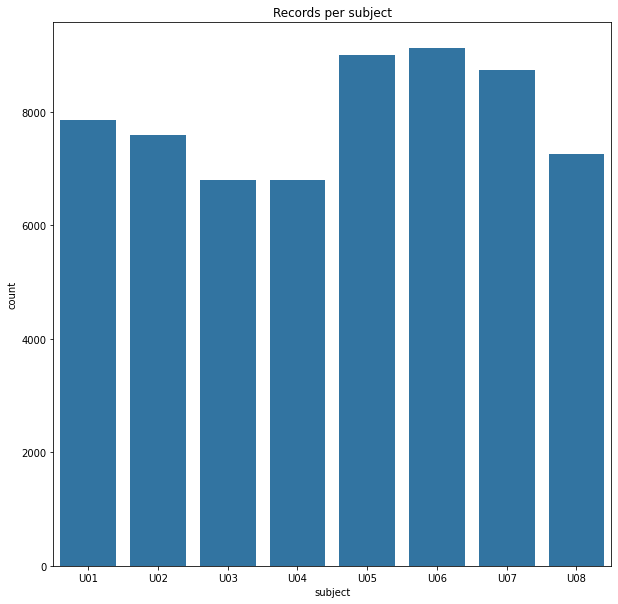

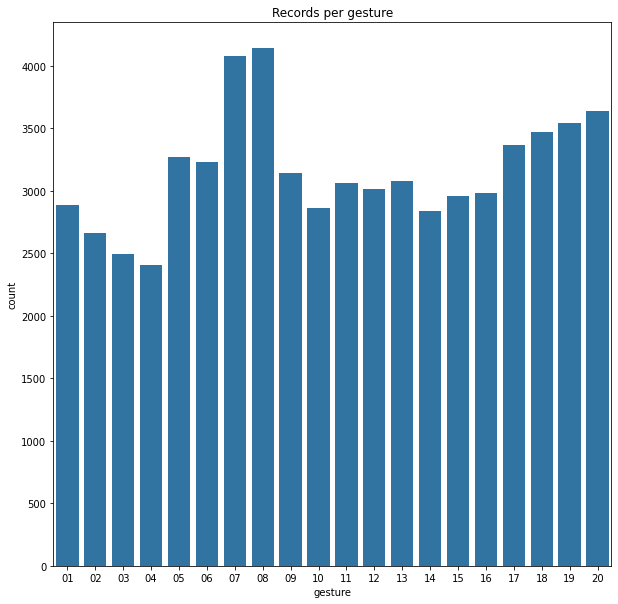

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

sns.countplot(x = 'subject',
              data = dataset_scaled,
              palette=[sns.color_palette()[0]]
              );
plt.title("Records per subject");
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(x = 'gesture',
              data = dataset_scaled,
              palette=[sns.color_palette()[0]]
              );
plt.title("Records per gesture");
plt.show()

f, axes = plt.subplots(20, 4, figsize=(100,400), sharex="all", sharey="all")

i = 0
for gesture in ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'):
    i += 1
    #f, axes = plt.subplots(1, 4, figsize=(80,20), sharex="all", sharey="row")
    df = dataset_scaled[dataset_scaled.gesture==gesture]
    #df = df[df.subject=="U02"]
    s = sns.boxplot(x="subject", y="X", hue="event", data=df, ax=axes[i-1,0])
    s.legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="Samples", \
               title_fontsize = 18, \
               shadow = True, \
               facecolor = 'white');
    s = sns.boxplot(x="subject", y="Y", hue="event", data=df, ax=axes[i-1,1])
    s.legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="Samples", \
               title_fontsize = 18, \
               shadow = True, \
               facecolor = 'white');
    s = sns.boxplot(x="subject", y="Z", hue="event", data=df, ax=axes[i-1,2])
    s.legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="Samples", \
               title_fontsize = 18, \
               shadow = True, \
               facecolor = 'white');
    s = sns.boxplot(x="subject", y="magnitude", hue="event", data=df, ax=axes[i-1,3])
    s.legend(fontsize = 15, \
               bbox_to_anchor= (1.03, 1), \
               title="Samples", \
               title_fontsize = 18, \
               shadow = True, \
               facecolor = 'white');
plt.show()


import matplotlib.pyplot as plt
import numpy as np
import math

i = 0
for gesture in ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'):
    i += 1
    j = 0
    for subject in ('U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08'):
        j += 1
        k = 0
        for event in ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'):
            k += 1
            df = dataset[dataset.gesture==gesture]
            df = df[df.subject==subject]
            df = df[df.event==event]
            df.sort_values(by=['event.timestamp'])
            
            df_standarized = dataset_standarized[dataset_standarized.gesture==gesture]
            df_standarized = df_standarized[df_standarized.subject==subject]
            df_standarized = df_standarized[df_standarized.event==event]
            df_standarized.sort_values(by=['event.timestamp'])
            
            t = df["event.timestamp"]

            x = df["X"]
            x_std = df_standarized["X"]
            y = df["Y"]
            y_std = df_standarized["Y"]
            z = df["Z"]
            z_std = df_standarized["Z"]

            plt.figure(figsize=(20,20))

            plt.subplot(3, 2, 1)
            plt.plot(t, x, '.-')
            plt.title('X acceleration on direct data')
            plt.ylabel('X acceleration')

            plt.subplot(3, 2, 2)
            plt.plot(t, x_std, '.-')
            plt.title('X acceleration on standarized data')
            plt.ylabel('X acceleration')

            plt.subplot(3, 2, 3)
            plt.plot(t, y, '.-')
            plt.title('Y acceleration on direct data')
            plt.ylabel('Y acceleration')

            plt.subplot(3, 2, 4)
            plt.plot(t, y_std, '.-')
            plt.title('Y acceleration on standarized data')
            plt.ylabel('Y acceleration')

            plt.subplot(3, 2, 5)
            plt.plot(t, z, '.-')
            plt.title('Z acceleration on direct data')
            plt.ylabel('Z acceleration')

            plt.subplot(3, 2, 6)
            plt.plot(t, z_std, '.-')
            plt.title('Z acceleration on standarized data')
            plt.ylabel('Z acceleration')

            
            plt.show()      


In [4]:
import numpy as np
import math

features_event = None

i = 0
for gesture in ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'):
    i += 1
    j = 0
    for subject in ('U01', 'U02', 'U03', 'U04', 'U05', 'U06', 'U07', 'U08'):
        j += 1
        k = 0
        for event in ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'):
            k += 1
                    
            df = dataset_scaled[dataset_scaled.gesture==gesture]
            df = df[df.subject==subject]
            df = df[df.event==event]
            df.sort_values(by=['event.timestamp'])

            df_event = pd.DataFrame(columns = ["gesture","subject", "event"])
            df_event = df_event.append({'gesture' :gesture, 'subject' : subject, 'event' : event, \
#                                        'minx': df["X"].min(), 'miny': df["Y"].min(), 'minz': df["Z"].min(), 'minmagnitude': df["magnitude"].min(), \
#                                        'maxx': df["X"].max(), 'maxy': df["Y"].max(), 'maxz': df["Z"].max(), 'maxmagnitude': df["magnitude"].max(), \
                                        'meanx': df["X"].mean(), 'meany': df["Y"].mean(), 'meanz': df["Z"].mean(), 'meanmagnitude': df["magnitude"].mean(), \
                                        'stdx': df["X"].std(), 'stdy': df["Y"].std(), 'stdz': df["Z"].std(), 'stdmagnitude': df["magnitude"].std(), \
#                                        'madx': df["X"].mad(), 'mady': df["Y"].mad(), 'madz': df["Z"].mad(), 'madnmagnitude': df["magnitude"].mad(), \
                                        'semx': df["X"].sem(), 'semy': df["Y"].sem(), 'semz': df["Z"].sem(), 'semmagnitude': df["magnitude"].sem(), \
                                        'kurtx': df["X"].kurt(), 'kurty': df["Y"].kurt(), 'kurtz': df["Z"].kurt(), 'kurtmagnitude': df["magnitude"].kurt(), \
                                        'skewx': df["X"].skew(), 'skewy': df["Y"].skew(), 'skewz': df["Z"].skew(), 'skewmagnitude': df["magnitude"].skew(), \
                                       }, \
                                       ignore_index=True)
#            df_event = df_event.append({'gesture' :gesture, 'subject' : subject, 'event' : event, \
#                                        'minx': df["X"].min(), 'miny': df["Y"].min(), 'minz': df["Z"].min(), 'minmagnitude': df["magnitude"].min(), 'min_fft_magnitude': df["fft_magnitude"].min(), 'min_fft_angle': df["fft_angle"].min(), \
#                                        'maxx': df["X"].max(), 'maxy': df["Y"].max(), 'maxz': df["Z"].max(), 'maxmagnitude': df["magnitude"].max(), 'max_fft_magnitude': df["fft_magnitude"].max(), 'max_fft_angle': df["fft_angle"].max(), \
#                                        'meanx': df["X"].mean(), 'meany': df["Y"].mean(), 'meanz': df["Z"].mean(), 'meanmagnitude': df["magnitude"].mean(), 'mean_fft_magnitude': df["fft_magnitude"].mean(), 'mean_fft_angle': df["fft_angle"].mean(), \
#                                        'stdx': df["X"].std(), 'stdy': df["Y"].std(), 'stdz': df["Z"].std(), 'stdmagnitude': df["magnitude"].std(), 'std_fft_magnitude': df["fft_magnitude"].std(), 'std_fft_angle': df["fft_angle"].std(), \
#                                        'madx': df["X"].mad(), 'mady': df["Y"].mad(), 'madz': df["Z"].mad(), 'madnmagnitude': df["magnitude"].mad(), 'mad_fft_magnitude': df["fft_magnitude"].mad(), 'mad_fft_angle': df["fft_angle"].mad(), \
#                                        'kurtx': df["X"].kurt(), 'kurty': df["Y"].kurt(), 'kurtz': df["Z"].kurt(), 'kurtmagnitude': df["magnitude"].kurt(), 'kurt_fft_magnitude': df["fft_magnitude"].kurt(), 'kurt_fft_angle': df["fft_angle"].kurt(), \
#                                        'skewx': df["X"].skew(), 'skewy': df["Y"].skew(), 'skewz': df["Z"].skew(), 'skewmagnitude': df["magnitude"].skew(), 'skew_fft_magnitude': df["fft_magnitude"].skew(), 'min_fft_angle': df["fft_angle"].skew(), \
#                                       }, \
#                                       ignore_index=True)
            #df_event = df_event.append({'gesture' :gesture, 'subject' : subject, 'event' : event, \
            #                            #'minmagnitude': df["magnitude"].min(), 'min_fft_magnitude': df["fft_magnitude"].min(), 'min_fft_angle': df["fft_angle"].min(), \
            #                            #'maxmagnitude': df["magnitude"].max(), 'max_fft_magnitude': df["fft_magnitude"].max(), 'max_fft_angle': df["fft_angle"].max(), \
            #                            'meanmagnitude': df["magnitude"].mean(), 'mean_fft_magnitude': df["fft_magnitude"].mean(), 'mean_fft_angle': df["fft_angle"].mean(), \
            #                            'stdmagnitude': df["magnitude"].std(), 'std_fft_magnitude': df["fft_magnitude"].std(), 'std_fft_angle': df["fft_angle"].std(), \
            #                            'madnmagnitude': df["magnitude"].mad(), 'mad_fft_magnitude': df["fft_magnitude"].mad(), 'mad_fft_angle': df["fft_angle"].mad(), \
            #                            'kurtmagnitude': df["magnitude"].kurt(), 'kurt_fft_magnitude': df["fft_magnitude"].kurt(), 'kurt_fft_angle': df["fft_angle"].kurt(), \
            #                            'skewmagnitude': df["magnitude"].skew(), 'skew_fft_magnitude': df["fft_magnitude"].skew(), 'min_fft_angle': df["fft_angle"].skew(), \
            #                           }, \
            #                           ignore_index=True)
            #print(df_event)
            if features_event is None:
                features_event = df_event.copy()
            else:
                features_event = pd.concat([features_event, df_event])

print(features_event)


   gesture subject event  kurtmagnitude     kurtx     kurty     kurtz  \
0       01     U01    01      -0.559695  1.691470  1.889655 -1.111449   
0       01     U01    02       0.404612  0.612814  4.170997  1.646641   
0       01     U01    03       3.640054  0.880459  1.566262  9.855637   
0       01     U01    04       2.172256  0.333985  1.582618  5.403992   
0       01     U01    05       3.223108 -0.231660  3.957199  1.116237   
..     ...     ...   ...            ...       ...       ...       ...   
0       20     U08    16      -0.820559 -0.824459  0.320427  1.010012   
0       20     U08    17      -0.670255 -1.249473 -0.574757 -0.079412   
0       20     U08    18      -0.981257 -0.542455 -0.388141 -0.020632   
0       20     U08    19       0.291336 -0.871581 -0.455961 -0.318882   
0       20     U08    20       0.732400 -0.753744 -0.917770  0.724537   

    meanmagnitude     meanx     meany  ...      semy      semz  skewmagnitude  \
0        1.712885  0.355685 -0.285715  ...

20
3200
7


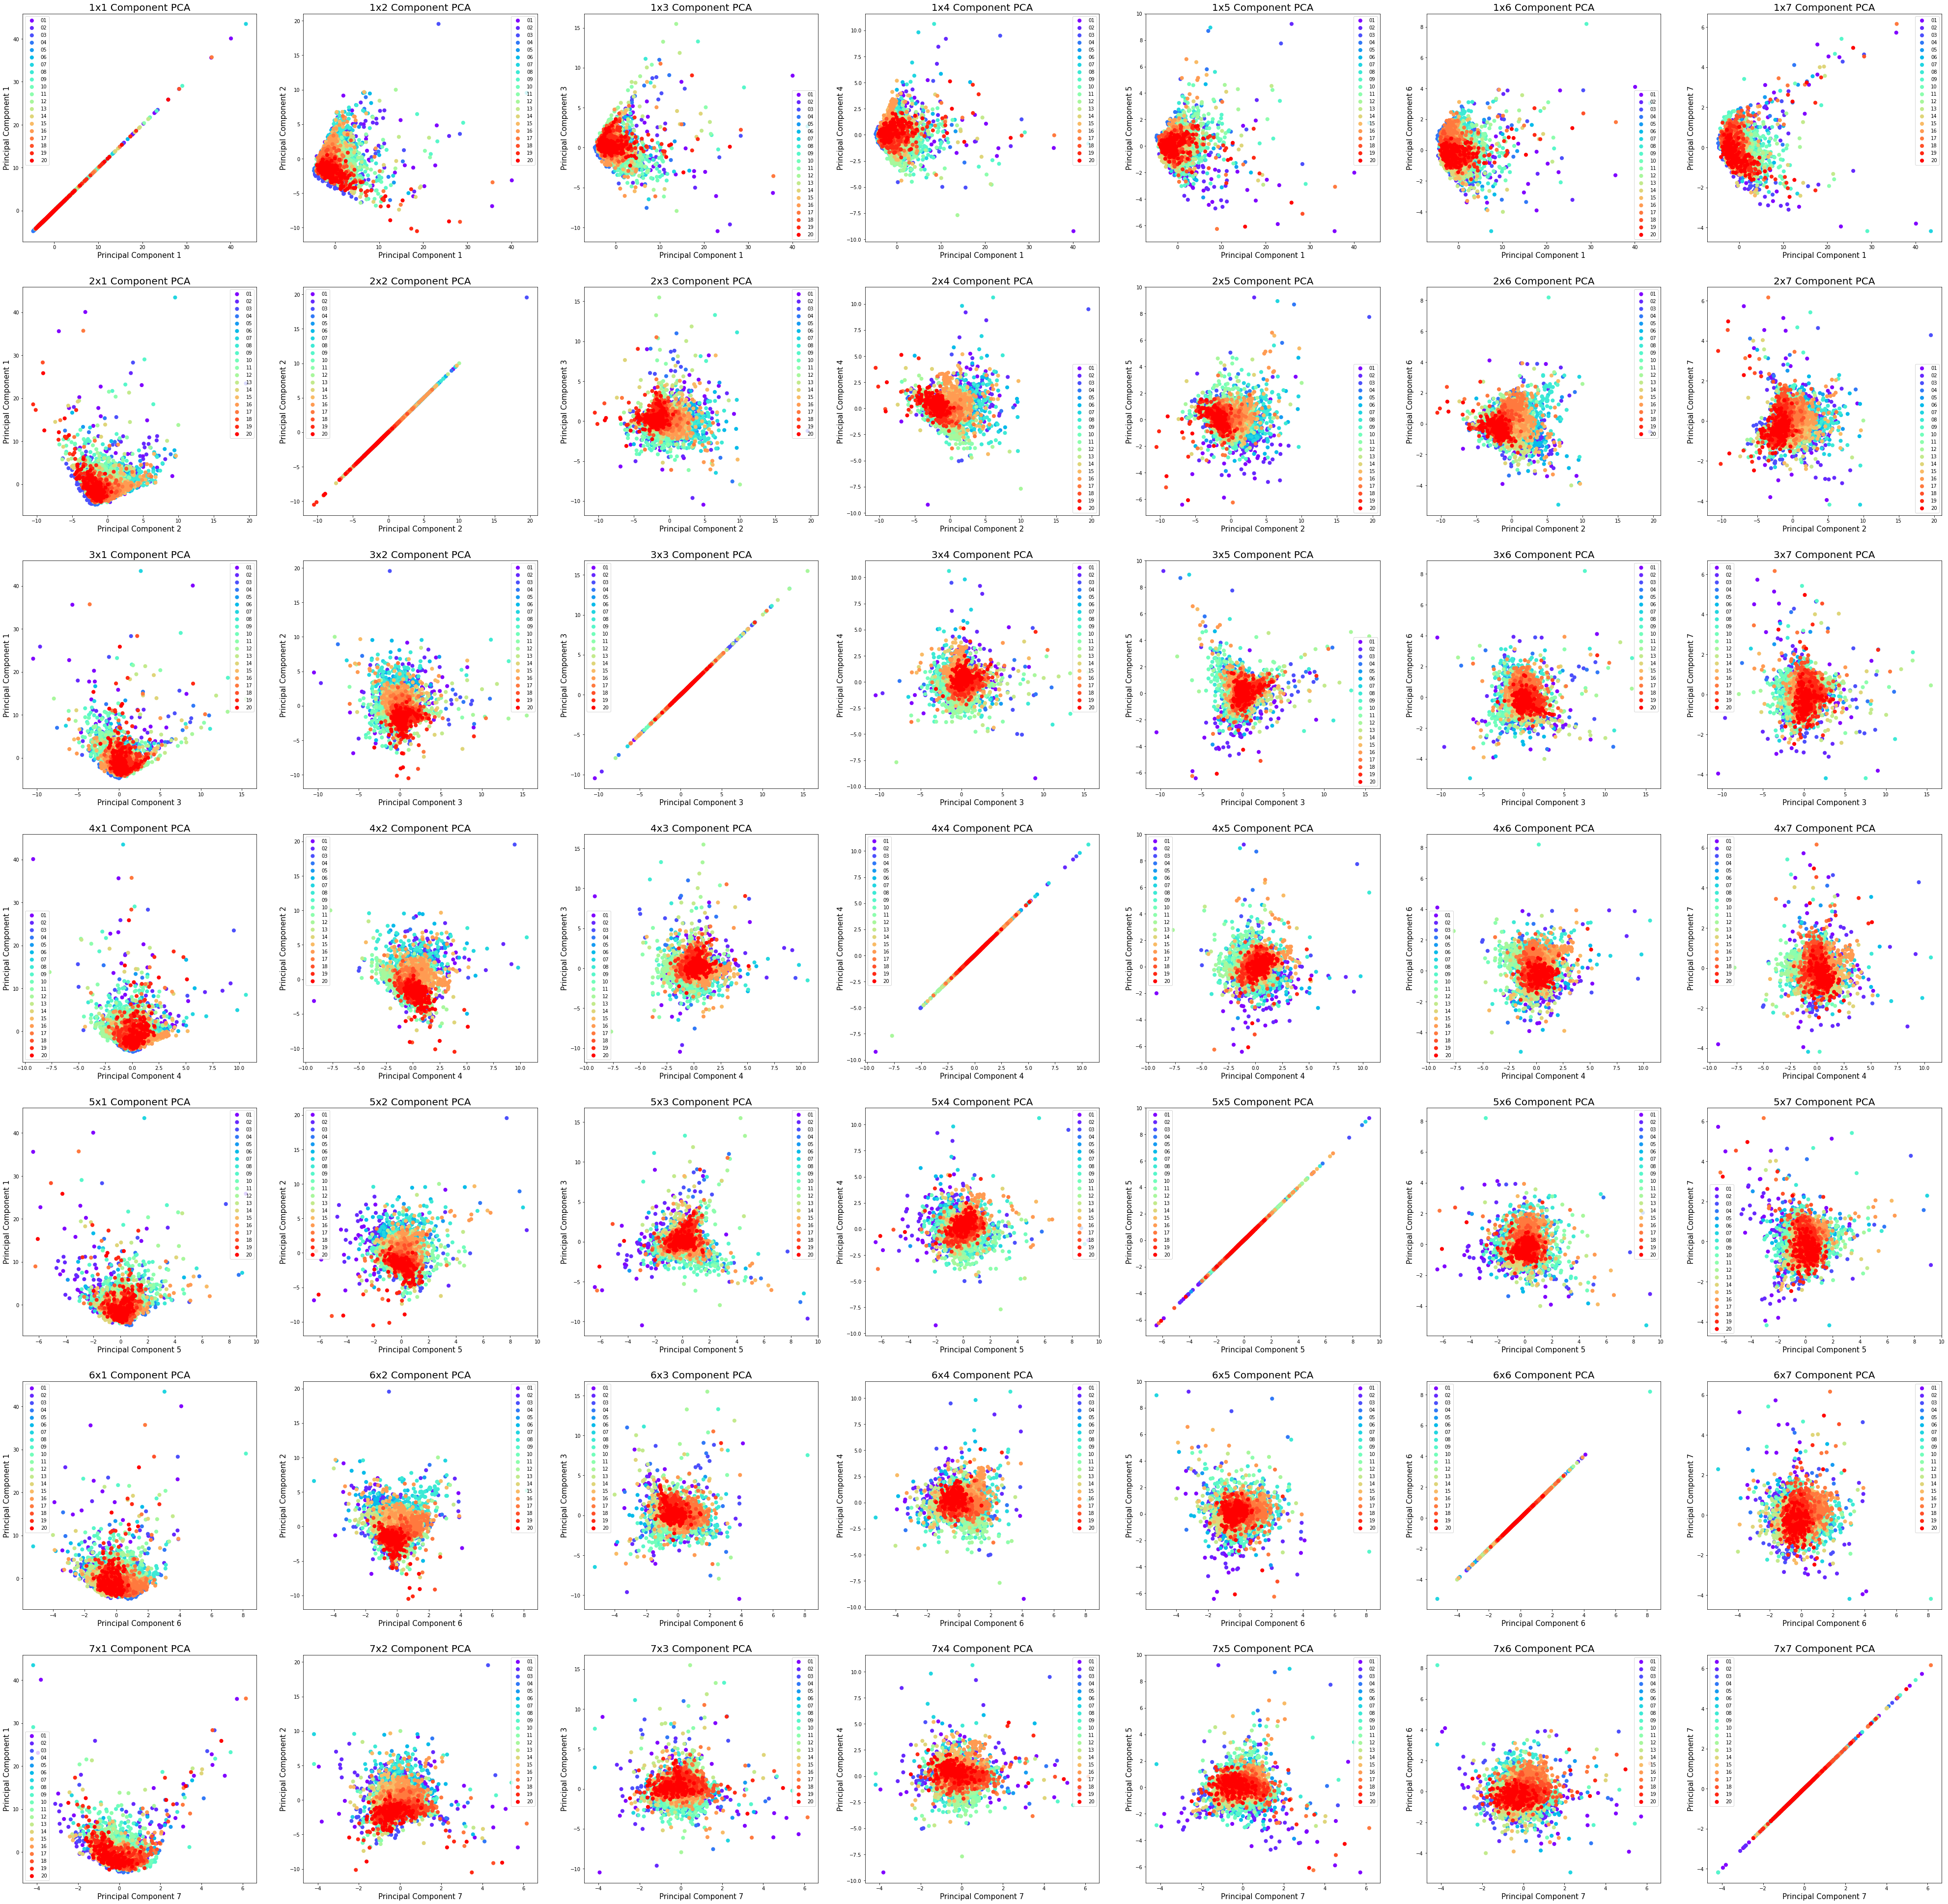

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

work = features_event.copy()
targets = pd.DataFrame(work[["gesture","subject","event"]], columns=["gesture","subject","event"])
targets.reset_index(inplace=True, drop=True)
work = work.drop(labels = ["gesture","subject", "event"], axis = 1)

#pca = PCA(n_components=3)
pca = PCA(.95)
principalComponents = pca.fit_transform(work)
#print(principalComponents[0])
#print(pca.explained_variance_ratio_)
#total = 0
#for tmp in pca.explained_variance_ratio_:
#    total += tmp
#print(total)
print(pca.n_features_)
print(pca.n_samples_)
#print(pca.noise_variance_)
print(pca.n_components_)
#print(pca.components_)
columns = []
for i in range(pca.n_components_):
    columns.append("principal component "+str(i+1))
#print(columns)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
finalDf = pd.concat([principalDf, targets], axis = 1)
#print(finalDf)

import matplotlib.cm as cm

fig = plt.figure(figsize = (70,70))
i = 0
for i in range(pca.n_components_):
    j = 0
    for j in range(pca.n_components_):
    
        ax = fig.add_subplot(pca.n_components_,pca.n_components_,pca.n_components_*i+j+1) 
        ax.set_xlabel('Principal Component ' + str(i + 1), fontsize = 15)
        ax.set_ylabel('Principal Component ' + str(j + 1), fontsize = 15)
        ax.set_title(str(i + 1) + 'x' + str(j + 1) + ' Component PCA', fontsize = 20)


        targets = finalDf['gesture'].unique()
        #colors = range(20)
        colors = cm.rainbow(np.linspace(0, 1, targets.size))
        #print(colors)
        for target, color in zip(targets,colors):
            indicesToKeep = finalDf['gesture'] == target
            colorarray = []
            for row in indicesToKeep.iteritems():
                if row[1] == True:
                    colorarray.append(color)
            ax.scatter( finalDf.loc[indicesToKeep, 'principal component '+ str(i + 1)]
                        , finalDf.loc[indicesToKeep, 'principal component '+ str(j + 1)]
                        , c = colorarray
                        #, cmap='Accent'
                        , s = 50)
            ax.legend(targets)
            ax.grid()
plt.show()

[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    4.7s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    6.2s
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed:   13.0s
[Parallel(n_jobs=60)]: Done 680 tasks      | elapsed:   22.2s
[Parallel(n_jobs=60)]: Done 1130 tasks      | elapsed:   33.9s
[Parallel(n_jobs=60)]: Done 1680 tasks      | elapsed:   48.2s
[Parallel(n_jobs=60)]: Done 2330 tasks      | elapsed:  1.1min
[Parallel(n_jobs=60)]: Done 3080 tasks      | elapsed:  1.4min
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:  1.5min finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>LogisticRegression: ideal=0.364, cv=0.358


[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    0.6s
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed:    2.0s
[Parallel(n_jobs=60)]: Done 680 tasks      | elapsed:    3.8s
[Parallel(n_jobs=60)]: Done 1130 tasks      | elapsed:    6.2s
[Parallel(n_jobs=60)]: Done 1680 tasks      | elapsed:    9.1s
[Parallel(n_jobs=60)]: Done 2330 tasks      | elapsed:   12.6s
[Parallel(n_jobs=60)]: Done 3080 tasks      | elapsed:   16.6s
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:   17.2s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>RidgeClassifier: ideal=0.302, cv=0.308


[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    0.6s
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed:    1.8s
[Parallel(n_jobs=60)]: Done 680 tasks      | elapsed:    3.7s
[Parallel(n_jobs=60)]: Done 1130 tasks      | elapsed:    5.9s
[Parallel(n_jobs=60)]: Done 1680 tasks      | elapsed:    8.8s
[Parallel(n_jobs=60)]: Done 2330 tasks      | elapsed:   12.0s
[Parallel(n_jobs=60)]: Done 3080 tasks      | elapsed:   15.9s
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:   16.6s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>SGDClassifier: ideal=0.210, cv=0.206


[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    0.3s
[Parallel(n_jobs=60)]: Done 540 tasks      | elapsed:    1.2s
[Parallel(n_jobs=60)]: Done 1240 tasks      | elapsed:    2.3s
[Parallel(n_jobs=60)]: Done 2140 tasks      | elapsed:    3.7s
[Parallel(n_jobs=60)]: Done 3081 out of 3200 | elapsed:    5.2s remaining:    0.1s
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:    5.4s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>PassiveAggressiveClassifier: ideal=0.183, cv=0.187


[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    0.5s
[Parallel(n_jobs=60)]: Done 540 tasks      | elapsed:    1.5s
[Parallel(n_jobs=60)]: Done 1240 tasks      | elapsed:    2.5s
[Parallel(n_jobs=60)]: Done 2140 tasks      | elapsed:    4.2s
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:    5.8s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>KNeighborsClassifier: ideal=0.435, cv=0.429


[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    0.3s
[Parallel(n_jobs=60)]: Done 540 tasks      | elapsed:    1.1s
[Parallel(n_jobs=60)]: Done 1240 tasks      | elapsed:    2.1s
[Parallel(n_jobs=60)]: Done 2140 tasks      | elapsed:    3.5s
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:    5.0s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>DecisionTreeClassifier: ideal=0.347, cv=0.329


[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    0.3s
[Parallel(n_jobs=60)]: Done 540 tasks      | elapsed:    1.3s
[Parallel(n_jobs=60)]: Done 1240 tasks      | elapsed:    2.4s
[Parallel(n_jobs=60)]: Done 2140 tasks      | elapsed:    3.8s
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:    5.4s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>ExtraTreeClassifier: ideal=0.273, cv=0.282


[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:   41.8s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:  2.5min
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed:  7.5min
[Parallel(n_jobs=60)]: Done 680 tasks      | elapsed: 14.9min
[Parallel(n_jobs=60)]: Done 1130 tasks      | elapsed: 24.5min
[Parallel(n_jobs=60)]: Done 1680 tasks      | elapsed: 36.4min
[Parallel(n_jobs=60)]: Done 2330 tasks      | elapsed: 50.2min
[Parallel(n_jobs=60)]: Done 3080 tasks      | elapsed: 66.2min
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed: 68.5min finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>LinearSVC: ideal=0.343, cv=0.340


[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    1.4s
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed:    4.3s
[Parallel(n_jobs=60)]: Done 680 tasks      | elapsed:    8.4s
[Parallel(n_jobs=60)]: Done 1130 tasks      | elapsed:   13.7s
[Parallel(n_jobs=60)]: Done 1680 tasks      | elapsed:   20.3s
[Parallel(n_jobs=60)]: Done 2330 tasks      | elapsed:   28.0s
[Parallel(n_jobs=60)]: Done 3080 tasks      | elapsed:   37.0s
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:   38.3s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>SVC: ideal=0.459, cv=0.459


[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    3.4s
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed:   10.6s
[Parallel(n_jobs=60)]: Done 680 tasks      | elapsed:   20.7s
[Parallel(n_jobs=60)]: Done 1130 tasks      | elapsed:   34.0s
[Parallel(n_jobs=60)]: Done 1680 tasks      | elapsed:   50.0s
[Parallel(n_jobs=60)]: Done 2330 tasks      | elapsed:  1.1min
[Parallel(n_jobs=60)]: Done 3080 tasks      | elapsed:  1.5min
[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:  1.6min finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.


>RandomForestClassifier: ideal=0.477, cv=0.481


[Parallel(n_jobs=60)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:    3.0s
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed:    9.4s
[Parallel(n_jobs=60)]: Done 680 tasks      | elapsed:   18.7s
[Parallel(n_jobs=60)]: Done 1130 tasks      | elapsed:   30.7s
[Parallel(n_jobs=60)]: Done 1680 tasks      | elapsed:   45.2s
[Parallel(n_jobs=60)]: Done 2330 tasks      | elapsed:  1.0min
[Parallel(n_jobs=60)]: Done 3080 tasks      | elapsed:  1.4min


>ExtraTreesClassifier: ideal=0.492, cv=0.480
Correlation: 0.997


[Parallel(n_jobs=60)]: Done 3200 out of 3200 | elapsed:  1.4min finished


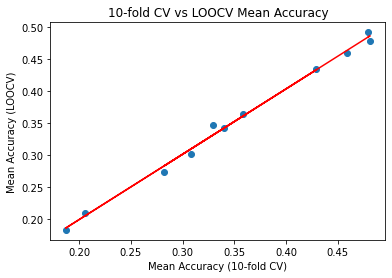

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# create the dataset
def get_dataset():
    X = finalDf.copy().drop(labels = ["gesture","subject", "event"], axis = 1).to_numpy()
    y = finalDf.copy()["gesture"].to_list()
    return X, y
 
# retrieve the model to be evaluate
def get_model():
	model = LogisticRegression()
	return model

# get a list of models to evaluate
def get_models():
	models = list()
	models.append(LogisticRegression(penalty="l2",max_iter=100000,solver="sag"))
	models.append(RidgeClassifier(copy_X=True, max_iter=100000, solver="sag"))
	models.append(SGDClassifier(max_iter=100000))
	models.append(PassiveAggressiveClassifier(max_iter=100000))
	models.append(KNeighborsClassifier(n_neighbors=5))
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC(max_iter=100000))
	models.append(SVC())
#	models.append(GaussianNB())
#	models.append(AdaBoostClassifier())
#	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
#	models.append(GaussianProcessClassifier(max_iter_predict=10000))
#	models.append(GradientBoostingClassifier())
#	models.append(LinearDiscriminantAnalysis())
#	models.append(QuadraticDiscriminantAnalysis())
	return models
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
	# get the dataset
	X, y = get_dataset()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=60, verbose=1)
	# return scores
	return mean(scores)

# define test conditions
ideal_cv = LeaveOneOut()
# define folds to test
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1000)
# get the list of models to consider
models = get_models()
# collect results
ideal_results, cv_results = list(), list()
# evaluate each model
for model in models:
	# evaluate model using each test condition
	cv_mean = evaluate_model(cv, model)
	ideal_mean = evaluate_model(ideal_cv, model)
	# check for invalid results
	if isnan(cv_mean) or isnan(ideal_mean):
		continue
	# store results
	cv_results.append(cv_mean)
	ideal_results.append(ideal_mean)
	# summarize progress
	print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
# calculate the correlation between each test condition
corr, _ = pearsonr(cv_results, ideal_results)
print('Correlation: %.3f' % corr)
# scatter plot of results
pyplot.scatter(cv_results, ideal_results)
# plot the line of best fit
coeff, bias = polyfit(cv_results, ideal_results, 1)
line = coeff * asarray(cv_results) + bias
pyplot.plot(cv_results, line, color='r')
# label the plot
pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
pyplot.xlabel('Mean Accuracy (10-fold CV)')
pyplot.ylabel('Mean Accuracy (LOOCV)')
# show the plot
pyplot.show()

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy
 
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', init='glorot_uniform'):
	# create model
	model = Sequential()
	model.add(Dropout(0.4, input_shape=(pca.n_components_,)))
	model.add(Dense(12, input_dim=pca.n_components_, kernel_initializer=init, activation='relu'))
	model.add(Dense(12, kernel_initializer=init, activation='relu'))
	model.add(Dropout(0.4))
	model.add(Dense(targets.size, kernel_initializer=init, activation='relu'))
	model.add(Dense(targets.size, kernel_initializer=init, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
 
# fix random seed for reproducibility
seed = 1000
numpy.random.seed(seed)
# create the dataset
def get_dataset():
    X = finalDf.copy().drop(labels = ["gesture","subject", "event"], axis = 1).to_numpy()
    y = finalDf.copy()["gesture"].to_list()
    return X, y

X, Y = get_dataset()

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
cat_Y = np_utils.to_categorical(encoded_Y)
# create model
#model = KerasClassifier(build_fn=create_model, verbose=1)
# create model
model = KerasClassifier(build_fn=create_model, epochs=1500, batch_size=12, verbose=0)
# evaluate using 10-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())
